In [4]:
try:
    import pandas as pd
except ImportError:
    print("Pandas not installed")
    %pip install pandas --user


try:
    import matplotlib.pyplot as plt
except ImportError:
    print("Matplotlib not installed")
    %pip install matplotlib --user


import ssl


ssl._create_default_https_context = ssl._create_unverified_context


In [5]:

archivo = pd.read_csv('StreamingHistory_Extended.csv')
archivo


C:\Users\49550528\AppData\Local\Temp\ipykernel_8320\3491062097.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  archivo = pd.read_csv('StreamingHistory_Extended.csv')


,ts,username,platform,ms_played,conn_country,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,is_podcast
0,2020-12-06T02:51:11Z,11145402699,"iOS 14.2 (iPhone12,3)",145610,AR,unknown,Hey Jude - Remastered 2015,The Beatles,1,spotify:track:0aym2LBJBk9DAYuHHutrIl,NaN,NaN,NaN,trackdone,fwdbtn,True,NaN,False,1607222710755,False
1,2020-12-06T02:53:31Z,11145402699,"iOS 14.2 (iPhone12,3)",138692,AR,unknown,Hacer un puente,La Franela,Hacer Un Puente,spotify:track:18Q3WTfyWX1tdS1cp42NhA,NaN,NaN,NaN,fwdbtn,fwdbtn,True,NaN,False,1607223071185,False
2,2020-12-06T02:53:53Z,11145402699,"iOS 14.2 (iPhone12,3)",22662,AR,unknown,Happy Together - Remastered,The Turtles,All the Singles,spotify:track:2admbUc576sC6M0QeUkg2C,NaN,NaN,NaN,fwdbtn,fwdbtn,True,NaN,False,1607223210387,False
3,2020-12-06T02:53:56Z,11145402699,"iOS 14.2 (iPhone12,3)",2716,AR,unknown,Demons,Imagine Dragons,Night Visions,spotify:track:5qaEfEh1AtSdrdrByCP7qR,NaN,NaN,NaN,fwdbtn,fwdbtn,True,NaN,False,1607223233165,False
4,2020-12-06T02:53:57Z,11145402699,"iOS 14.2 (iPhone12,3)",116,AR,unknown,"Paint It, Black",The Rolling Stones,Aftermath,spotify:track:63T7DJ1AFDD6Bn8VzG6JE8,NaN,NaN,NaN,fwdbtn,fwdbtn,True,NaN,False,1607223236453,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125344,2018-10-05T22:44:53Z,11145402699,"iOS 12.0 (iPhone8,1)",1365,AR,unknown,Gente Que No Sabe Lo Que Quiere,Litto Nebbia,Solo Se Trata de Vivir / Solopiano Vol. 1,spotify:track:3u8sP95YHOsYwRQfms6kgc,NaN,NaN,NaN,fwdbtn,fwdbtn,False,NaN,False,1538779491211,False
125345,2018-10-05T22:44:54Z,11145402699,"iOS 12.0 (iPhone8,1)",1344,AR,unknown,11 Y 6,Fito Paez,Giros,spotify:track:2PkTjm1QAJCZbJ9MqC4RqA,NaN,NaN,NaN,fwdbtn,fwdbtn,False,NaN,False,1538779492740,False
125346,2018-10-05T22:44:55Z,11145402699,"iOS 12.0 (iPhone8,1)",832,AR,unknown,Mientes,Charly García,Tango 4,spotify:track:670dXRMKr9vVtGk01dYeSr,NaN,NaN,NaN,fwdbtn,fwdbtn,False,NaN,False,1538779494205,False
125347,2018-10-05T22:44:56Z,11145402699,"iOS 12.0 (iPhone8,1)",1194,AR,unknown,Apostar al Amor,Los Tipitos,Push,spotify:track:6PyBNCpOX5uOjKDNjNNgjq,NaN,NaN,NaN,fwdbtn,fwdbtn,False,NaN,False,1538779495059,False


In [5]:
#Muestra el historial de reproducciones en Spotify. Incluye fecha y hora de finalización de cada reproducción (endTime), nombres de artistas  (artistName), nombres de canciones (trackName) y cuanto dura la reproduccion (msPlayed)


In [16]:
archivo['ts'] = pd.to_datetime(archivo['ts']) 
 # Lo que estoy haciendo es convertir el ts a un formato de fechas y horas
fecha_inicio = archivo['ts'].min()
fecha_fin = archivo['ts'].max()
print(f"\nreproducciones registradas desde: {fecha_inicio.date()} hasta: {fecha_fin.date()}")



reproducciones registradas desde: 2014-06-27 hasta: 2024-05-23


In [12]:
canciones_unicas = archivo['master_metadata_track_name'].nunique()
#master metadate track name es lo que engloba todas las canciones escuchadas, entonces lo que estoy haciendo es al dare el nunique, que cuenta el numero de valores, los printea.
print(f"\ntotal de canciones diferentes escuchadas: {canciones_unicas}")



total de canciones diferentes escuchadas: 2762


In [8]:

#ms_played ya esta en el documento como milisegundos de reproduccion, y lo que hago aca es pasarlo a horas y luego printearlo con la funcion de la duracion de horas.
duracion_total_ms = archivo['ms_played'].sum()
duracion_total_horas = duracion_total_ms / (1000 * 60 * 60)
print(f"\nduracion total de reproducciones: {duracion_total_horas:.2f} horas")



duracion total de reproducciones: 470.48 horas


In [ ]:
#lo que estoy haciendo es calcular la cantidad de tiempo escuchada por cada artista y ahi ver cual es el que mas tiene con el sum, que calcula la suma.
artista_mas_escuchado = archivo.groupby('master_metadata_album_artist_name')['ms_played'].sum().idxmax()
print(f"\nartista más escuchado: {artista_mas_escuchado}")



artista más escuchado: Charly García


In [28]:
#aca estoy haciendo lo mismo que en el anterior punto pero con la cancion en vez de el artista, usando casi el mismo codigo
cancion_mas_escuchada = archivo.groupby(['master_metadata_track_name', 'master_metadata_album_artist_name'])['ms_played'].sum().idxmax()
print("cancion mas escuchada:", cancion_mas_escuchada)





cancion mas escuchada: ('Redbone', 'Childish Gambino')


In [ ]:
#el codigo esta bastante sobrepensado, pero funciona de manera que, con las mismas lineas de codigo de antes las usa para filtrar dentro del artista mas escuchado la cancion maas escuchada y su tiempo total.
artista_mas_escuchado = archivo.groupby("master_metadata_album_artist_name")["ms_played"].sum().idxmax()
cancion_mas_escuchada = archivo[archivo["master_metadata_album_artist_name"] == artista_mas_escuchado] \
    .groupby("master_metadata_track_name")["ms_played"].sum().idxmax()
tiempo_horas = archivo[(archivo["master_metadata_album_artist_name"] == artista_mas_escuchado) &
                  (archivo["master_metadata_track_name"] == cancion_mas_escuchada)]["ms_played"].sum() / (1000 * 60 * 60)
print(f"Artista más escuchado: {artista_mas_escuchado}")
print(f"Canción más escuchada de ese artista: {cancion_mas_escuchada}")
print(f"Tiempo total reproducido: {tiempo_horas:.2f} horas")

Artista más escuchado: Charly García
Canción más escuchada de ese artista: Hablando a Tu Corazón
Tiempo total reproducido: 8.72 horas


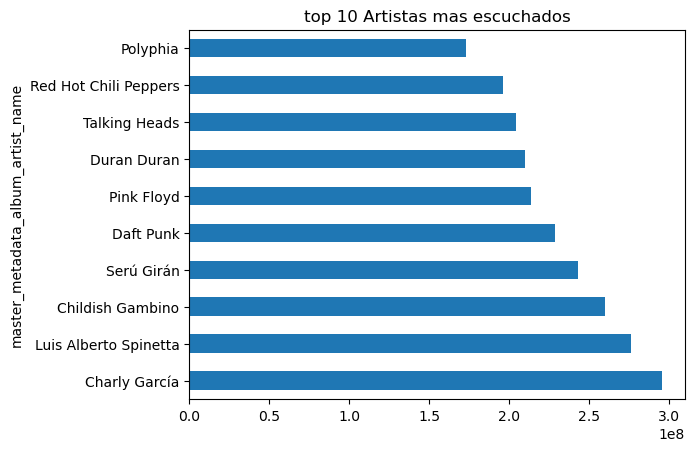

In [10]:
#lo unico nuevo es el barh que lo descubri en google y es la forma de mostrar el grafico de manera horizontal
artista_mas_escuchado = archivo.groupby('master_metadata_album_artist_name')['ms_played'].sum().sort_values(ascending=False).head(10)
artista_mas_escuchado.plot(kind='barh')
plt.title('top 10 Artistas mas escuchados')
plt.show()


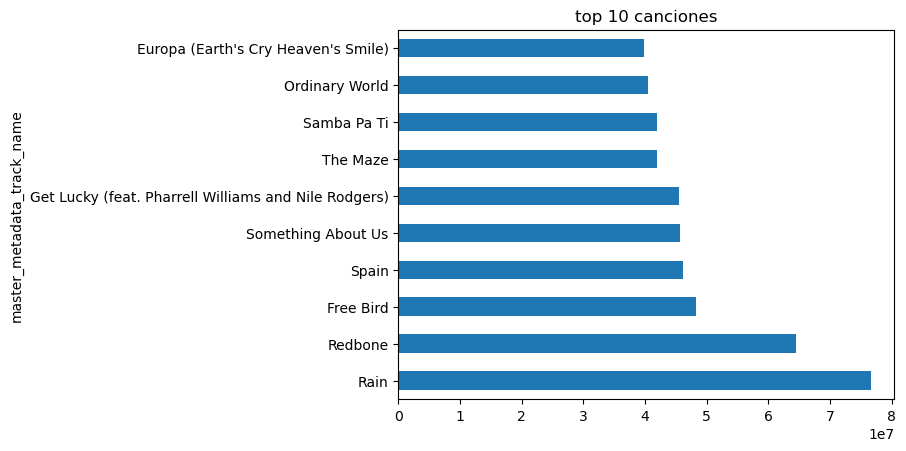

In [ ]:
#aca hago exactamente lo mismo pero con las canciiones con la otra variable
cancion_mas_escuchada = archivo.groupby('master_metadata_track_name')['ms_played'].sum().sort_values(ascending=False).head(10)
cancion_mas_escuchada.plot(kind='barh')
plt.title('top 10 canciones mas escuchadas')
plt.show()

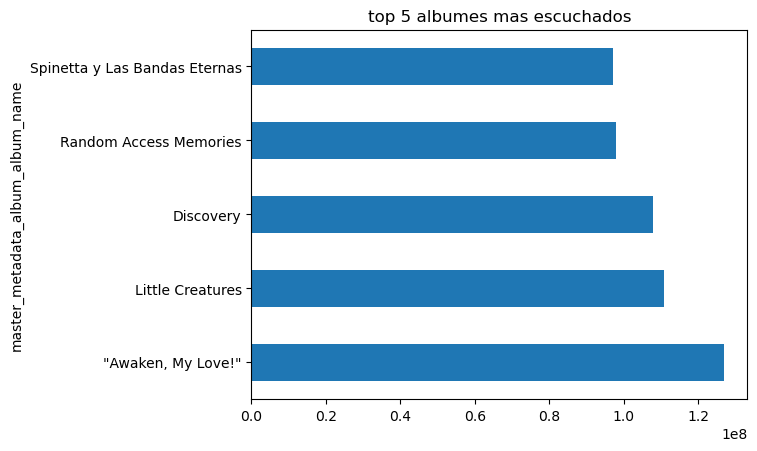

In [ ]:
album_mas_escuchado = archivo.groupby('master_metadata_album_album_name')['ms_played'].sum().sort_values(ascending=False).head(5)
album_mas_escuchado.plot(kind='barh')
plt.title('top 5 albumes mas escuchados')
plt.show()


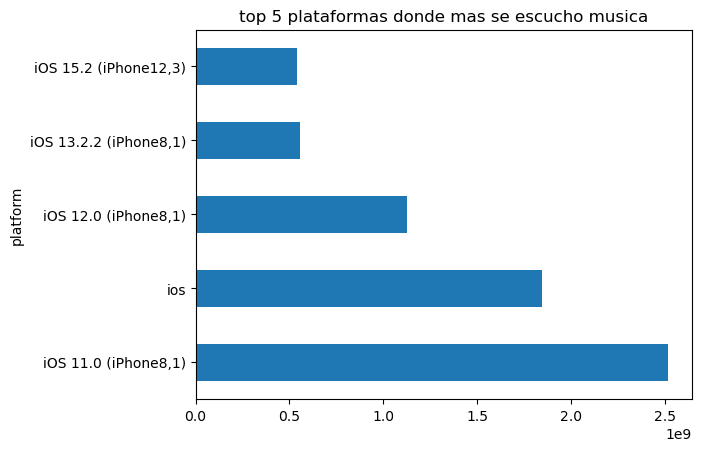

In [11]:
plataformas_mas_escuchadas = archivo.groupby('platform')['ms_played'].sum().sort_values(ascending=False).head(5)
plataformas_mas_escuchadas.plot(kind='barh')
plt.title('top 5 plataformas donde mas se escucho musica')
plt.show()

In [ ]:
canciones_mas_salteadas = archivo.groupby('master_metadata_album_album_name')['ms_played'].sum().sort_values(ascending=False).head(5)
album_mas_escuchado.plot(kind='barh')
plt.title('top 5 albumes mas escuchados')
plt.show()